In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from preprocessing import splitter
from preprocessing import Encoder
from metrics import matrix
sp=splitter()
mt=matrix()
en=Encoder()

/home/sohel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#importing dataset
dataset=pd.read_csv("iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


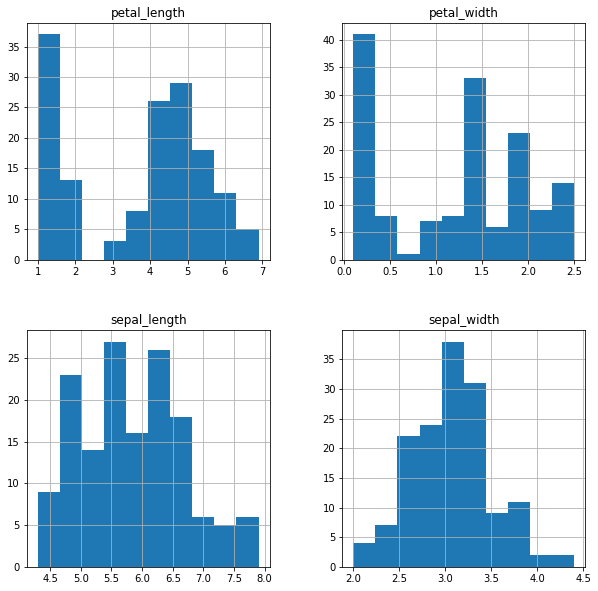

In [4]:
dataset.hist(figsize=(10,10))
plt.show()

In [5]:
x=dataset.iloc[:,0:4].values #independant
y=dataset.iloc[:,-1] #dependant

y=np.array(y)
y=y.reshape(150,1)

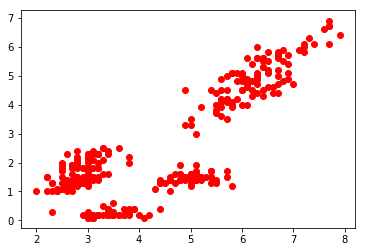

In [19]:
plt.scatter(x[:,0:2],x[:,2:4],color='red',marker='o')
#plt.scatter(x[:,2],x[:,3],color='blue',marker='o')
plt.show()

In [7]:
#y=y[:,1:]

In [8]:
x_train,x_test,y_train,y_test=sp.decomposition(x,y)
y_train.shape

(112, 1)

In [9]:
from sklearn.svm import SVC
cls=SVC(kernel='linear',random_state=0)
cls.fit(x_train,y_train)

/home/sohel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
y_pred=cls.predict(x_test)

In [11]:
acc=mt.accuracy(y_test,y_pred)
acc

0.9736842105263158